                                                    Algerian Forest Fires Dataset
                                                        
>>>Data Set Information:


The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

>>>Attribute Information:


Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations.

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42.

RH : Relative Humidity in %: 21 to 90.

Ws :Wind speed in km/h: 6 to 29.

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

>>>OPERATIONS PERFORMED :

    1. Data Cleaning 
    2. Exploratory data analysis
    3. Feature Selection 
    4. Linear Regression
    5. Lasso Regression 
    6. Ridge Regression
    7. Cross Validation

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset 

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv' , header = 1 )
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


                                                        DATA CLEANING 

In [4]:
#checking missing values 

def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100 
    return pd.concat((total , percent) , axis = 1 , keys = ['TOTAL' , 'PERCENT'])

miss_values = missing_values(df)
miss_values[miss_values != 0]

,TOTAL,PERCENT
Classes,3,1.214575
month,2,0.809717
year,2,0.809717
Temperature,2,0.809717
RH,2,0.809717
Ws,2,0.809717
Rain,2,0.809717
FFMC,2,0.809717
DMC,2,0.809717
DC,2,0.809717



The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [5]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN


In [6]:
#removing null values 

df.dropna().reset_index(drop = True) #reset index to replace missing the index

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,12.5,10.4,fire,NaN


In [8]:
df.iloc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
129,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [9]:
df.loc[:122 , "Region"] = 0
df.loc[122: , "Region"] = 1

In [10]:
df['Region'] = df['Region'].astype(int)

In [11]:
df = df.dropna().reset_index(drop = True)

In [12]:
df.iloc[[122]]
#we need to drop this row since it has repeated column names

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
df = df.drop(122).reset_index(drop = True)

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
#fixing space in column name in classes

df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#FIXING THE DATATYPE OF ALL THE COLUMNS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [17]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [20]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
# so since the data is cleaned we can import to a seperare data file

df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

                            EXPLORATORY DATA ANALYSIS

In [24]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [25]:
# here we can drop unneccessary columns for now 

df_copy = df.drop(['day', 'month' , 'year'] , axis = 1)
df_copy.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [26]:
df_copy['Classes'].value_counts()
#here we can see that there are more than two outputs due to whitespacing . this will difficult in encoding 

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [27]:
#since we have different patterns in values we will use str.contains to identify based on words

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire') , 0 , 1)
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

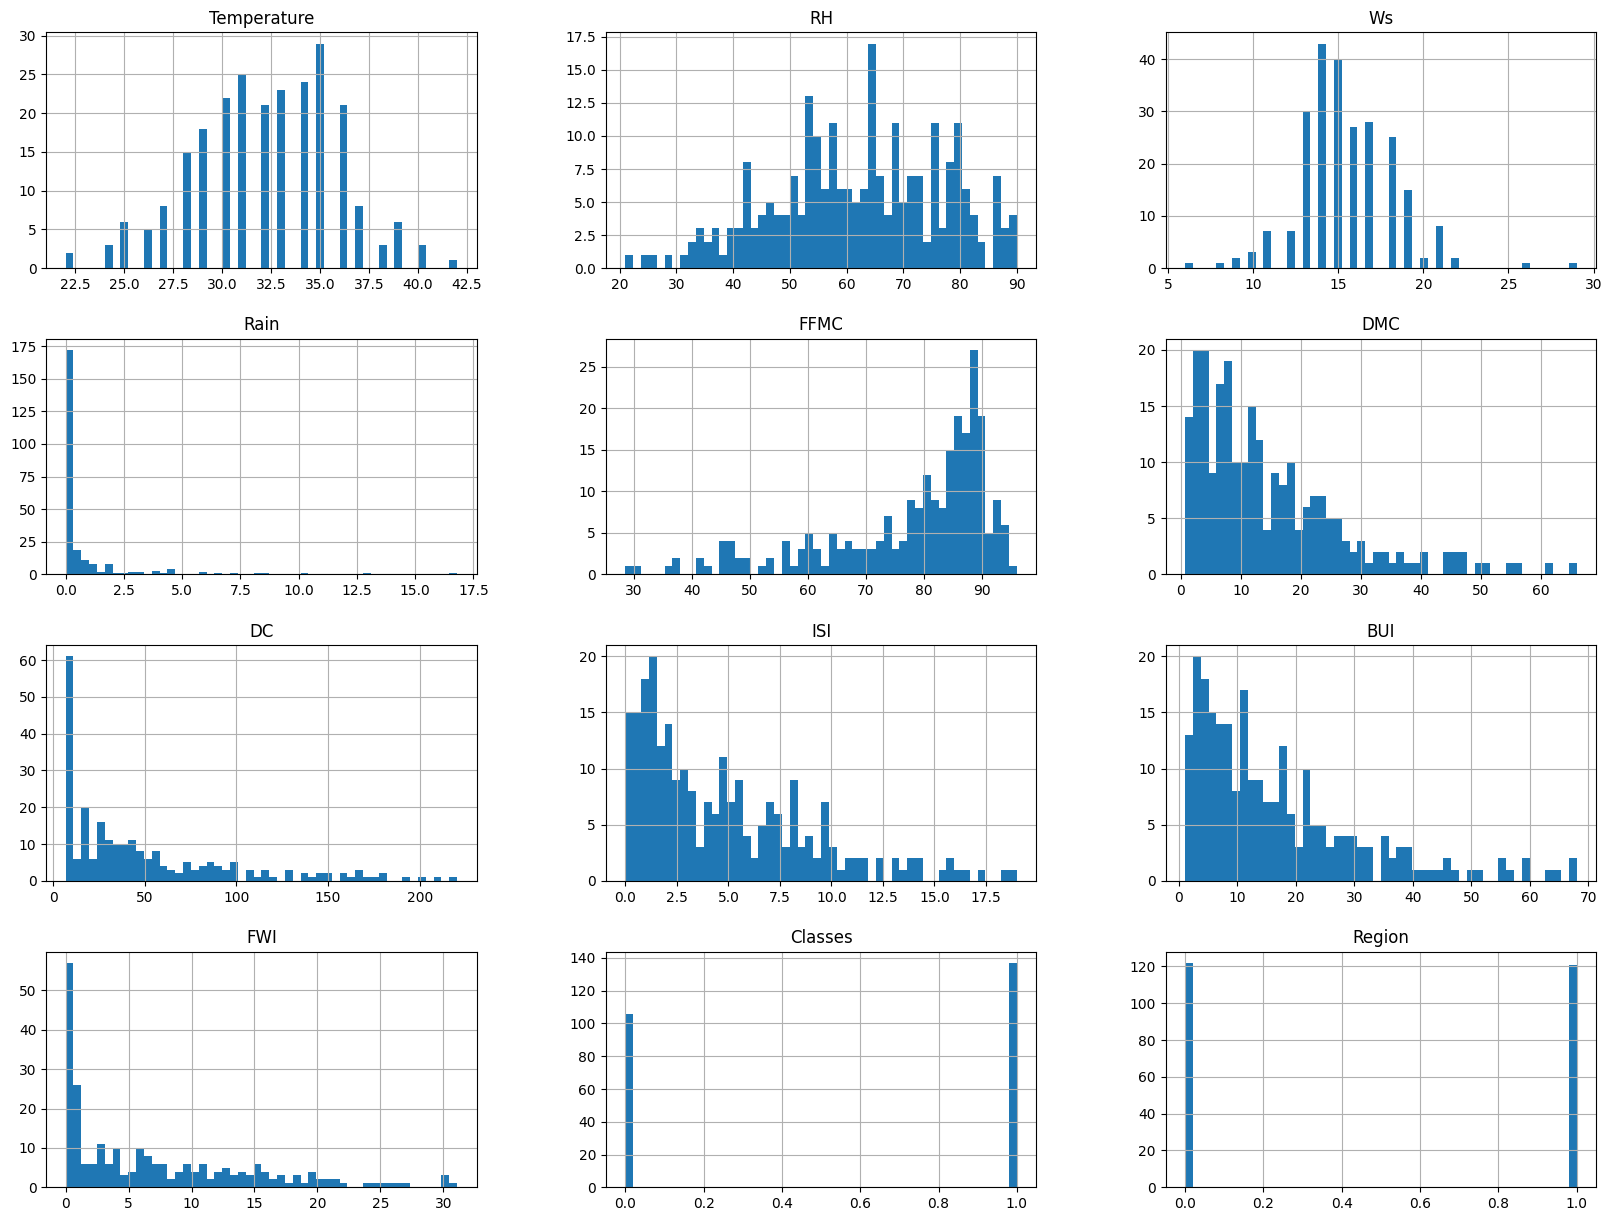

In [28]:
#plotting density plot for all features to visualize tre distribution of the features

df_copy.hist(bins = 50 , figsize = (20 , 15))
plt.show

<Axes: ylabel='Classes'>

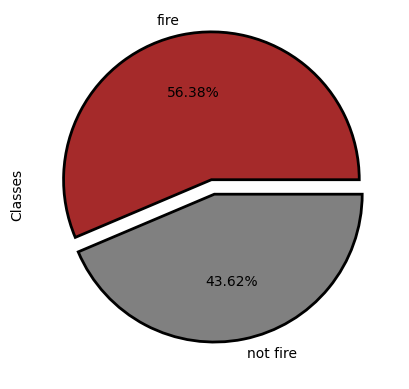

In [29]:
#percentage of fire and not fire

class_labels = ['fire' , 'not fire']
df_copy['Classes'].value_counts().plot(kind = 'pie' , labels = class_labels , autopct = '%1.2f%%' , colors = ['brown', 'grey'] , explode = (0.1 , 0) , wedgeprops={"edgecolor": "black", "linewidth": 2})

In [30]:
# Correlation 

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


/tmp/ipykernel_106/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

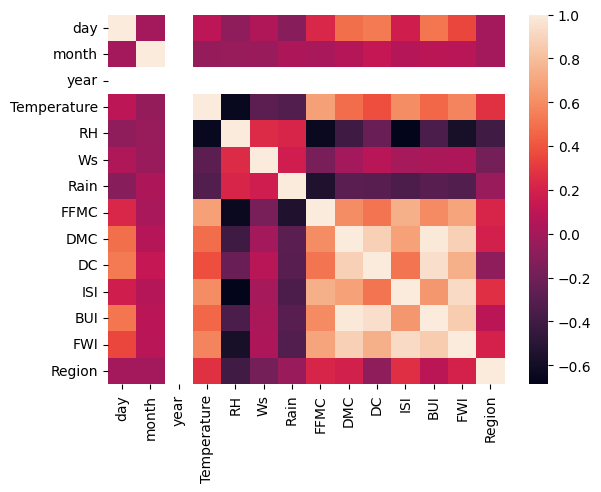

In [31]:
sns.heatmap(df.corr())

<Axes: >

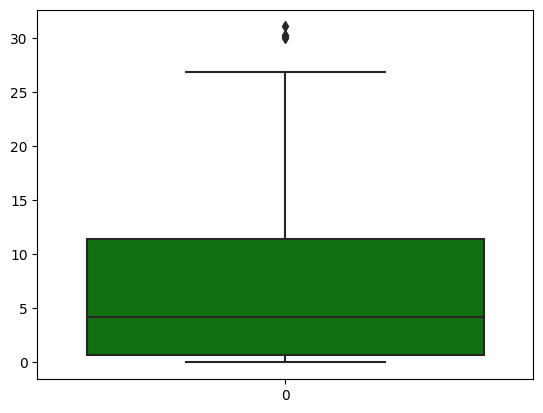

In [32]:
# box plots for my depenedent variable to check for outliers

sns.boxplot(df['FWI'] , color = 'green')

In [33]:
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


Monthly fire analysis

In [34]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 'not fire', 'fire')

In [35]:
df.groupby('month')['Classes'].size()

month
6    60
7    61
8    62
9    60
Name: Classes, dtype: int64

Text(0.5, 1.0, 'Fire analysis of sidi - bel region')

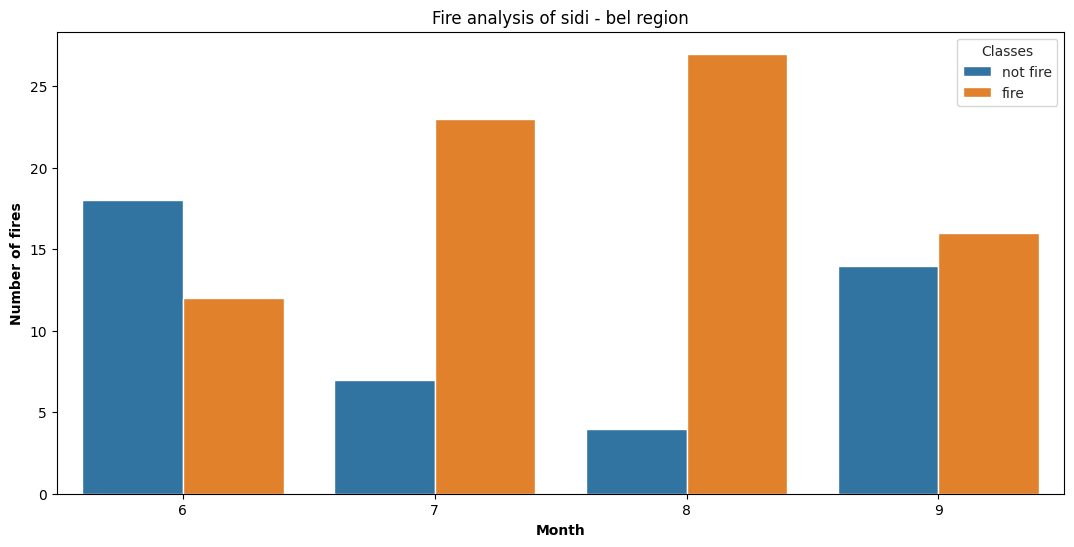

In [36]:
df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13 , 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue = 'Classes' , data = df_temp)
plt.xlabel('Month' , weight = 'bold')
plt.ylabel('Number of fires' , weight = 'bold')
plt.title('Fire analysis of sidi - bel region')

Text(0.5, 1.0, 'Fire analysis of bejaia region')

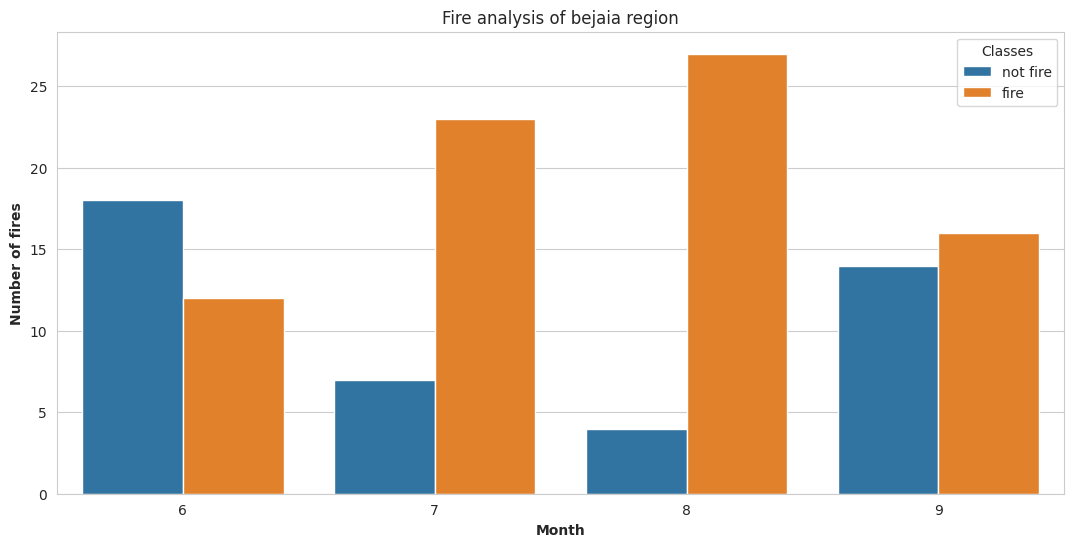

In [37]:
df_temp1 = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13 , 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue = 'Classes' , data = df_temp)
plt.xlabel('Month' , weight = 'bold')
plt.ylabel('Number of fires' , weight = 'bold')
plt.title('Fire analysis of bejaia region')

IT IS OBSERVED THAT AUGUST & SEPTEMBER HAD THE MOST NUMBER OF FOREST FIRES FOR BOTH REGIONS .
MOST OF THE FIRES HAPPENED IN AUGUST FOLLOWED BY JUNE , JULY & AUGUST 
LESS FIRES WAS ON SEPTEMBER

                                                    MODEL TRAINING 

In [38]:
#reading the cleaned dataset

df1 = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [39]:
#dropping unecessary columns 

df1.drop(['day' , 'month' , 'year'] , axis = 1 , inplace = True )

In [40]:
df1['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

In [41]:
#independent and dependent features

x = df1.drop('FWI' , axis = 1)
y = df1['FWI']

In [42]:
#train test split

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.25 , random_state = 42)

In [43]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [44]:
#feature selection based on correlation

x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

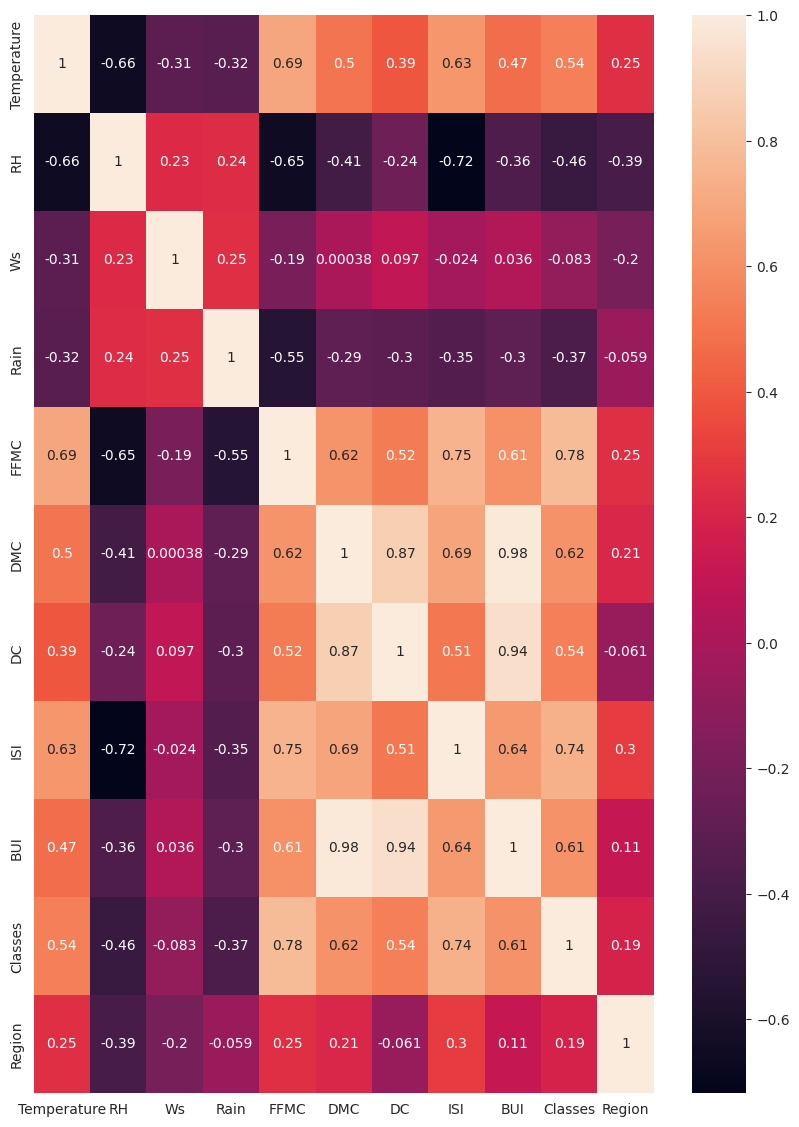

In [45]:
#check for multi colinearity 

plt.figure(figsize=(10,14))
corr = x_train.corr()
sns.heatmap(corr, annot = True)

In [46]:
#ets write a function to filter out highly co related features for more accurate model performance

def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
#threshold - Domain expertise manager will set .( here i have assumed as 85 percent)
corr_features = correlation(x_train , 0.85)

In [48]:
#drop features when correlation is more than 85 percent

x_train.drop(corr_features , axis = 1 , inplace = True)
x_test.drop(corr_features , axis = 1 , inplace = True)
x_train.shape , x_test.shape

((182, 9), (61, 9))

In [49]:
#feature scaling - Standardization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/tmp/ipykernel_106/3231485962.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scaling')

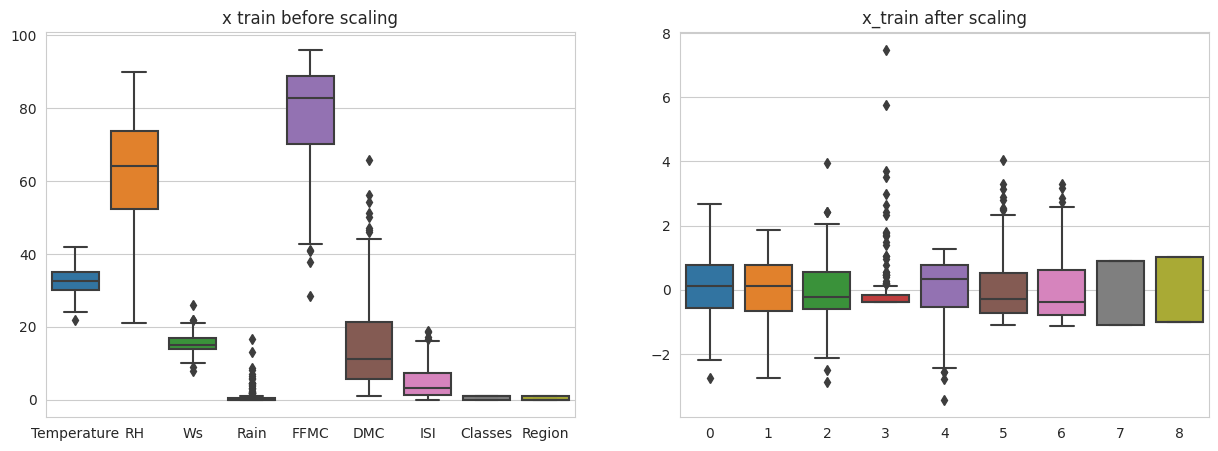

In [51]:
#box plots to understand effect of standard scaler

plt.subplots(figsize=(15 , 5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x train before scaling')
plt.subplot(1 ,2 , 2)
sns.boxplot(data = x_train_scaled)
plt.title('x_train after scaling')

                                                            LINEAR REGRESSION

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score

linreg = LinearRegression()
linreg.fit(x_train_scaled , y_train)
y_pred = linreg.predict(x_test_scaled)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test, y_pred)

print("mean absolute error " ,mae)
print("r2 score " , r2)

mean absolute error  0.5468236465249978
r2 score  0.9847657384266952


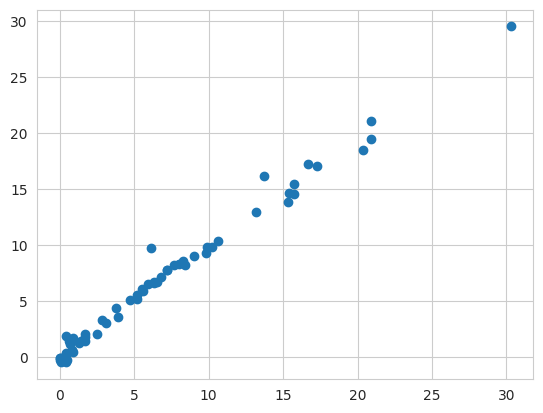

In [59]:
plt.scatter(y_test , y_pred)

#since the graph is linear and r2 score is 92% so the model prediction is very good

                                                            LASSO REGRESSION 

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score

lasso = Lasso()
lasso.fit(x_train_scaled , y_train)
y_pred = lasso.predict(x_test_scaled)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test, y_pred)

print("mean absolute error " ,mae)
print("r2 score " , r2)

mean absolute error  1.133175994914409
r2 score  0.9492020263112388


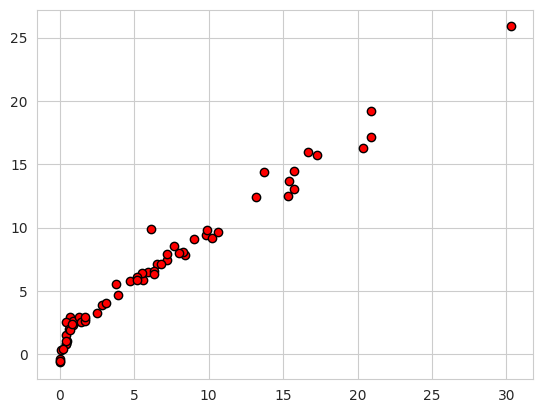

In [62]:
plt.scatter(y_test ,y_pred , color = 'red' , edgecolor = 'black')

                                                        LASSO CROSS VALIDATION 

In [69]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [70]:
lassocv.alpha_

0.05725391318234405

In [71]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

Mean absolute error 0.6199701158263433
R2 Score 0.9820946715928275


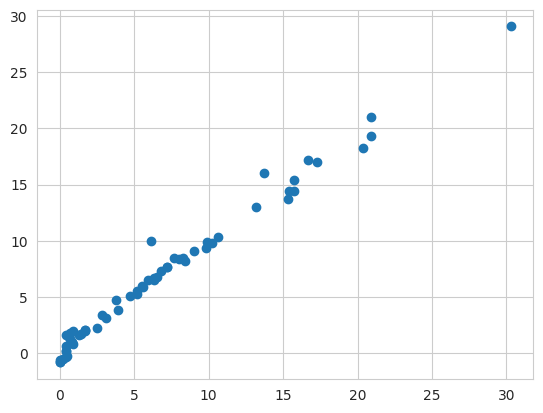

In [73]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

                                                        RIDGE REGRESSION

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , r2_score

Ridge = Ridge()
Ridge.fit(x_train_scaled , y_train)
y_pred = Ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test, y_pred)

print("mean absolute error " ,mae)
print("r2 score " , r2)

mean absolute error  0.5642305340105691
r2 score  0.9842993364555513


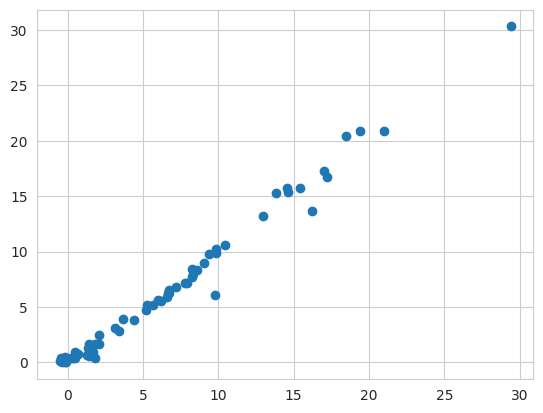

In [76]:
plt.scatter(y_pred , y_test)

                                                    RIDGE CROSS VALIDATION

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513


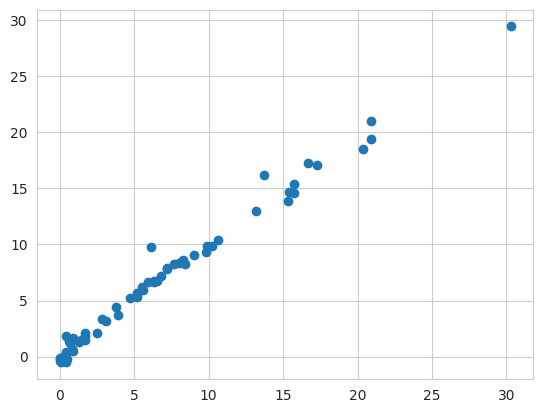

In [75]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)